# Implement Simple Logistic Regression in Python Using Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Importing Dataset and getting info

In [14]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Spliting Data into X and Y

In [16]:
X = df.drop('target',axis=1)
Y = df['target']

### Spliting into Train/Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Scaling X Data

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fitting the Regression Model on Training Data

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicting and Evaluating

In [20]:
pred = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.8524590163934426


In [22]:
matrix = confusion_matrix(y_test, pred)

Text(20.72222222222222, 0.5, 'True Label')

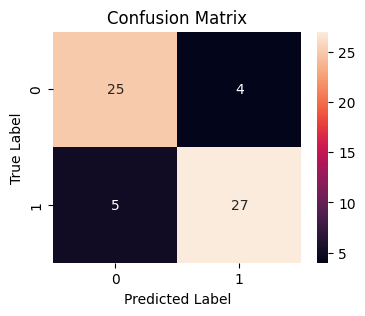

In [23]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel('True Label')

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Saving Model

In [ ]:
filename = 'Regression_Model.sav'
pickle.dump(model, open(filename, 'wb'))

### Saving scaler

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Loading Model

In [27]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8524590163934426
